# Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Reading the data

In [2]:
df = pd.read_excel("Datasets/MetroManilaAccidents(Time) - Copy.xlsx")
df.head()

,Non_Fatal,Fatal,Damage_to_property,Year,Time
0,244,12,605,2020,00:00-00:59
1,269,13,574,2020,01:00-01:59
2,228,11,542,2020,02:00-02:59
3,224,16,505,2020,03:00-03:59
4,273,9,628,2020,04:00-04:59


# Pivot Table

In [3]:
df.pivot_table(index="Year", columns="Time", aggfunc="sum", margins=True)

Damage_to_property                                                  \
Time        00:00-00:59 01:00-01:59 02:00-02:59 03:00-03:59 04:00-04:59   
Year                                                                      
2010                560        1134        1104        1000        1337   
2011                607         909         925         835        1024   
2012                729         987         998         859        1051   
2013                823        1056         934         935         997   
2014                986        1128        1021         968        1129   
2015               1000        1188        1100         985        1149   
2016               1361        1492        1267        1138        1440   
2017                442         673         250         211         263   
2018                206         261         214         192         232   
2019               1506        1572        1493        1430        1613   
2020                605         574         542         505         628   
All                8825       10974        9848        9058       10863   

                                                                  ...  \
Time 05:00-05:59 06:00-06:59 07:00-07:59 08:00-08:59 09:00-09:59  ...   
Year                                                              ...   
2010        1485        2103        3046        3421        3517  ...   
2011        1203        1834        2763        3137        3465  ...   
2012        1254        1956        2925        3265        3655  ...   
2013        1224        1982        3041        3301        3531  ...   
2014        1348        2220        3261        3489        3637  ...   
2015        1477        2256        3363        3590        3851  ...   
2016        1792        3092        4235        4527        4815  ...   
2017         403         925        1084        1141        1034  ...   
2018         374         715        1011         986         895  ...   
2019        2066        3033        4138        4544        4612  ...   
2020         972        1547        2407        2700        2866  ...   
All        13598       21663       31274       34101       35878  ...   

       Non_Fatal                                                              \
Time 15:00-15:59 16:00-16:59 17:00-17:59 18:00-18:59 19:00-19:59 20:00-20:59   
Year                                                                           
2010         644         696         757         585         640         650   
2011         715         751         825         670         746         684   
2012         732         798         904         676         769         732   
2013         824         838         911         690         800         735   
2014         778         797         859         710         769         762   
2015         830         921         385         835         787         719   
2016         840         843         935         748         788         732   
2017         985        1059         770         591         670         656   
2018         509         597         577         564         587         614   
2019         716         858         851         708         723         735   
2020         801         728         820         721         710         631   
All         8374        8886        8594        7498        7989        7650   

                                                  
Time 21:00-21:59 22:00-22:59 23:00-23:59     All  
Year                                              
2010         603         515         513   14880  
2011         611         598         541   15317  
2012         696         613         567   16111  
2013         669         660         585   16100  
2014         717         657         599   16211  
2015         704         668         666   16129  
2016         784         663         668   16311  
2017         624         584         567   16985  
2018         583     

# Data processing

In [4]:
data=df.iloc[:,0:2].values

# Identifying optimum number of cluster

In [5]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=50)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
    #Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve')
    plt.grid(True)
    plt.show()

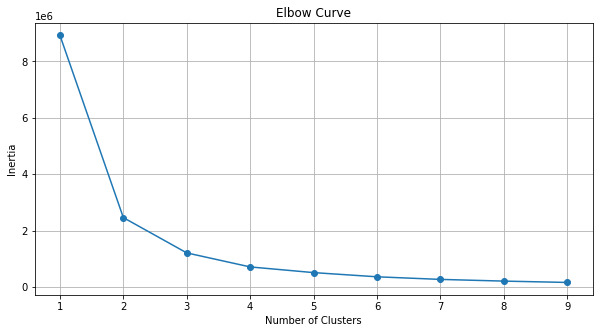

In [6]:
optimise_k_means(df.iloc[:,0:2].values, 10)

# Applying K-Means Clustering

In [7]:
cluster = KMeans(n_clusters = 3)
model = cluster.fit(data)
clusters = model.labels_
clusters

array([0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0],
      dtype=int32)

In [8]:
centroid_values = model.cluster_centers_
centroid_values

array([[386.91428571,  19.85714286],
       [832.87209302,  11.91860465],
       [657.99074074,  14.76851852]])

# Plotting the result
Visualising the cluster on the first two columns

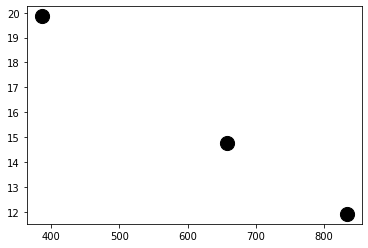

In [9]:
plt.scatter(centroid_values[:,0], centroid_values[:,1], c = 'black', s = 200)
plt.show()

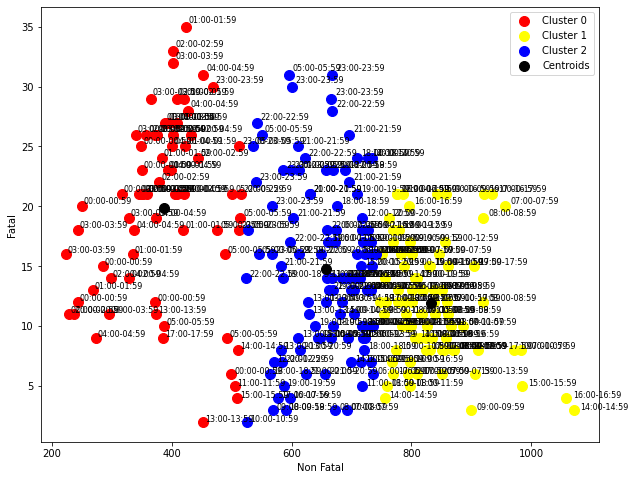

In [10]:
plt.figure(figsize= (10,8))
plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1],
           s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1],
           s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1],
           s = 100, c = 'blue', label = 'Cluster 2')

for i in range(len(data)):
    x = data[i][0]
    y = data[i][1]
#     plt.plot(x, y, 'bo')
    plt.text(x * (1 + 0.01), y * (1 + 0.01), df.Time[i], fontsize=8)

# plt.scatter(data[clusters == 0, 0], data[clusters == 0, 1],
#            s = 100, c = 'red', label = 'Cluster 0')
# plt.scatter(data[clusters == 1, 0], data[clusters == 1, 1],
#            s = 100, c = 'green', label = 'Cluster 1')
# plt.scatter(data[clusters == 2, 0], data[clusters == 2, 1],
#            s = 100, c = 'blue', label = 'Cluster 2')

#Plotting the centroids of the clusters
plt.scatter(centroid_values[:, 0], centroid_values[:,1],
           s = 100, c = 'black', label = 'Centroids')
plt.legend()
plt.xlabel('Non Fatal')
plt.ylabel('Fatal')
plt.show()

# Descriptive Statistics

In [11]:
df.describe()

,Non_Fatal,Fatal,Damage_to_property,Year
count,264.000000,264.000000,264.000000,264.000000
mean,643.083333,15.189394,2534.401515,2015.000000
std,184.084604,7.208078,1533.173383,3.168284
min,224.000000,2.000000,192.000000,2010.000000
25%,511.500000,9.750000,1018.500000,2012.000000
50%,682.500000,14.000000,2715.500000,2015.000000
75%,782.500000,21.000000,3700.250000,2018.000000
max,1071.000000,35.000000,5723.000000,2020.000000


In [12]:
df['Cluster'] = cluster.labels_

# DataFrame

In [13]:
from IPython.display import display, HTML

In [14]:
display(HTML(df.to_html()))

,Non_Fatal,Fatal,Damage_to_property,Year,Time,Cluster
0,244,12,605,2020,00:00-00:59,0
1,269,13,574,2020,01:00-01:59,0
2,228,11,542,2020,02:00-02:59,0
3,224,16,505,2020,03:00-03:59,0
4,273,9,628,2020,04:00-04:59,0
5,476,18,972,2020,05:00-05:59,0
6,699,13,1547,2020,06:00-06:59,2
7,802,12,2407,2020,07:00-07:59,1
8,759,5,2700,2020,08:00-08:59,1
9,704,11,2866,2020,09:00-09:59,2


In [15]:
df.Cluster.value_counts()

2    108
1     86
0     70
Name: Cluster, dtype: int64

In [16]:
df['Total'] = df.loc[:,['Fatal','Non_Fatal', 'Damage_to_property']].sum(axis=1)

In [21]:
groupedvalues = df.groupby('Time').sum().reset_index()
groupedvalues.head()

,Time,Non_Fatal,Fatal,Damage_to_property,Year,Cluster,Total
0,00:00-00:59,3630,192,8825,22165,0,12647
1,01:00-01:59,4487,254,10974,22165,2,15715
2,02:00-02:59,4053,253,9848,22165,0,14154
3,03:00-03:59,3680,247,9058,22165,0,12985
4,04:00-04:59,4244,241,10863,22165,0,15348


<Figure size 1656x504 with 0 Axes>

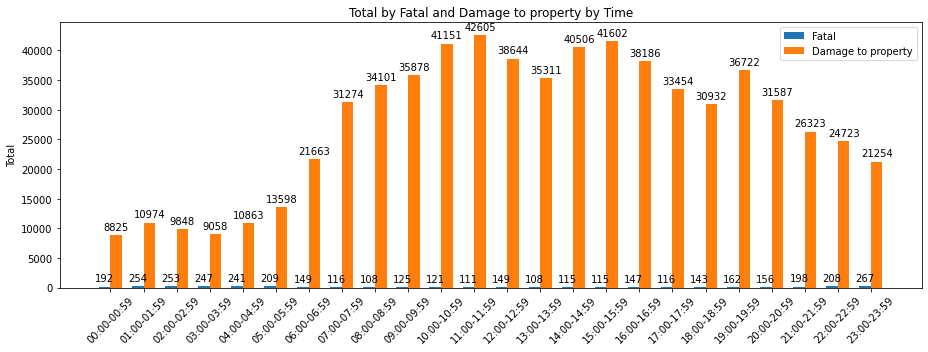

In [25]:
import matplotlib.pyplot as plt
import numpy as np

labels = groupedvalues.iloc[:,0].values
fatal = groupedvalues.iloc[:,2].values
damage_to_property = groupedvalues.iloc[:,3].values

fatal_total = 0
for i in fatal:
    fatal_total += i

damage_to_property_total = 0
for i in damage_to_property:
    damage_to_property_total += i


plt.rcParams["figure.figsize"] = (13,5)
# labels = ['G1', 'G2', 'G3', 'G4', 'G5']
# men_means = [20, 34, 30, 35, 27]
# women_means = [25, 32, 34, 20, 25]
plt.figure(figsize=(23,7))
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fatal, width, label='Fatal')
rects2 = ax.bar(x + width/2, damage_to_property, width, label='Damage to property')

# str(fatal) + ' (' + str(round((round(fatal,2) / fatal_total) * 100, 2)) + ')%'
#str(non_fatal) + ' (' + str(round((round(non_fatal,2) / non_fatal_total) * 100, 2)) + ')%' 

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('Total by Fatal and Damage to property by Time')
ax.set_xticks(x, labels, rotation=45)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [17]:
groupedvalues = df.groupby('Time').sum().reset_index()
groupedvalues.head()

,Time,Non_Fatal,Fatal,Damage_to_property,Year,Cluster,Total
0,00:00-00:59,3630,192,8825,22165,0,12647
1,01:00-01:59,4487,254,10974,22165,2,15715
2,02:00-02:59,4053,253,9848,22165,0,14154
3,03:00-03:59,3680,247,9058,22165,0,12985
4,04:00-04:59,4244,241,10863,22165,0,15348


# Total of Road Accidents Barplot

In [18]:
overall_total =groupedvalues.iloc[:,6].values

total = 0
for i in overall_total:
    total += i
# groupedvalues['overall_total'] = overall_total
# groupedvalues.head()
# overall_total
# total = total[0]
total

842866

Text(0.5, 1.0, 'Time')

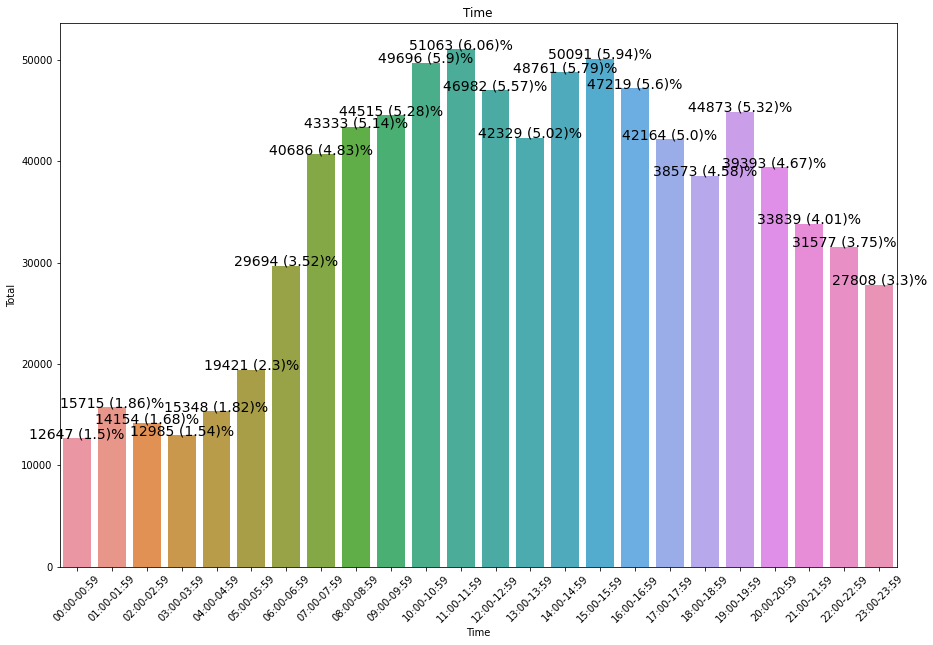

In [19]:
plt.figure(figsize=(15,10))
g =sns.barplot(x='Time',y='Total',data=groupedvalues)
plt.xticks(rotation=45)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Total, str(round(row.Total,2)) + ' (' + str(round((round(row.Total,2) / total) * 100, 2)) + ')%', color='black', ha="center", fontsize = 14)
plt.title('Time')

# Damage to property of Road Accidents Barplot

In [110]:
# Damage to property
overall_total =groupedvalues.iloc[:,3].values

total = 0
for i in overall_total:
    total += i
total

669082

Text(0.5, 1.0, 'Time')

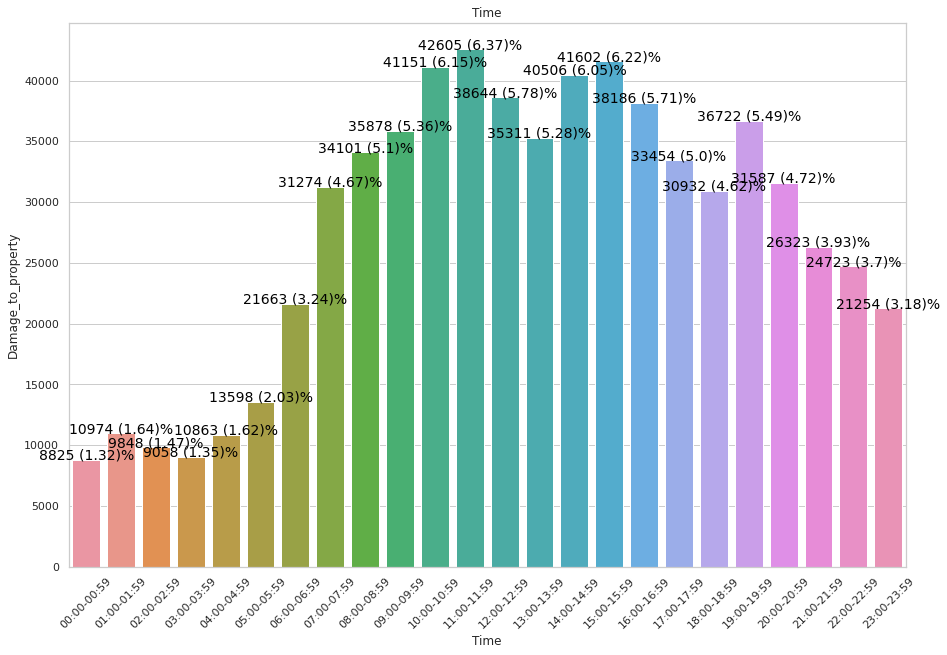

In [111]:
plt.figure(figsize=(15,10))
g =sns.barplot(x='Time',y='Damage_to_property',data=groupedvalues)
plt.xticks(rotation=45)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Damage_to_property, str(round(row.Damage_to_property,2)) + ' (' + str(round((round(row.Damage_to_property,2) / total) * 100, 2)) + ')%', color='black', ha="center", fontsize = 14)
plt.title('Time')

# Non Fatal of Road Accidents Barplot

In [112]:
# Non Fatal
overall_total =groupedvalues.iloc[:,1].values

total = 0
for i in overall_total:
    total += i
# groupedvalues['overall_total'] = overall_total
# groupedvalues.head()
# overall_total
# total = total[0]
total

169774

Text(0.5, 1.0, 'Time')

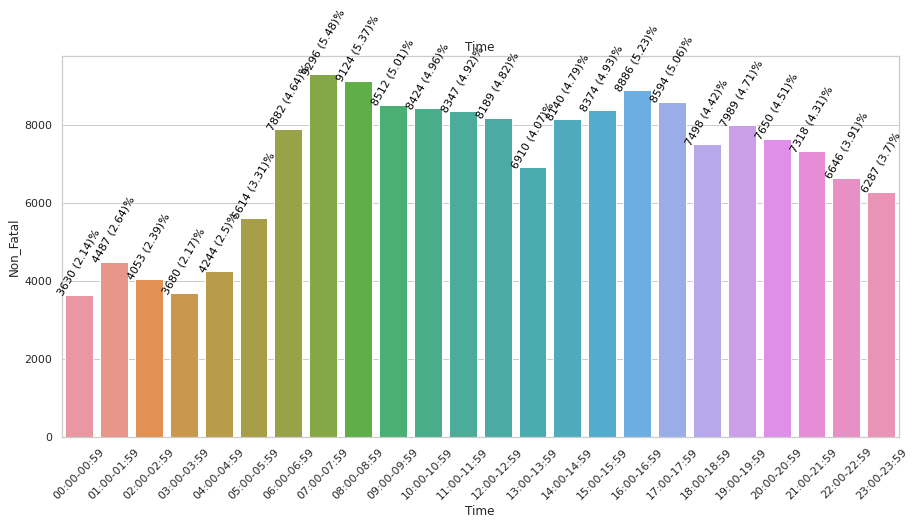

In [113]:
plt.figure(figsize=(15,7))
g =sns.barplot(x='Time',y='Non_Fatal',data=groupedvalues)
plt.xticks(rotation=45)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Non_Fatal, str(round(row.Non_Fatal,2)) + ' (' + str(round((round(row.Non_Fatal,2) / total) * 100, 2)) + ')%', color='black', ha="center", fontsize = 11, rotation=60)
plt.title('Time')

# Fatal of Road Accidents Barplot

In [114]:
# Fatal
overall_total =groupedvalues.iloc[:,2].values

total = 0
for i in overall_total:
    total += i
total

4010

Text(0.5, 1.0, 'Time')

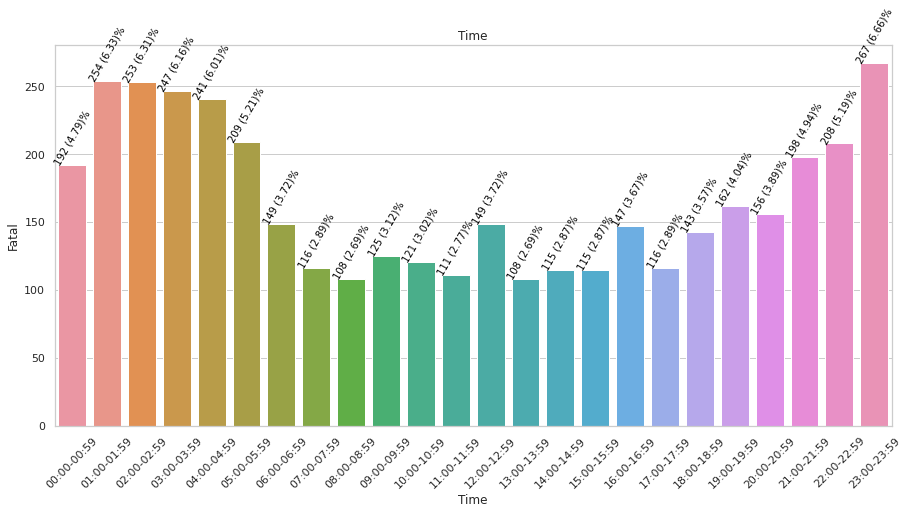

In [115]:
plt.figure(figsize=(15,7))
g =sns.barplot(x='Time',y='Fatal',data=groupedvalues)
plt.xticks(rotation=45)
for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Fatal, str(round(row.Fatal,2)) + ' (' + str(round((round(row.Fatal,2) / total) * 100, 2)) + ')%', color='black', ha="center", fontsize = 10, rotation=60)
plt.title('Time')

# Year of Road Accident Barplot

Text(0.5, 1.0, 'Time')

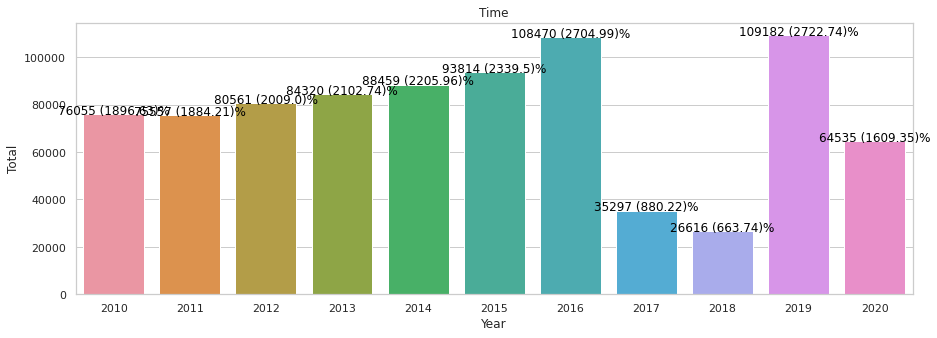

In [116]:
groupedvalues = df.groupby('Year').sum().reset_index()
groupedvalues.head()

plt.figure(figsize=(15,5))
g =sns.barplot(x='Year',y='Total',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.Total, str(round(row.Total,2)) + ' (' + str(round((round(row.Total,2) / total) * 100, 2)) + ')%', color='black', ha="center")
plt.title('Time')

# Cluster barplot

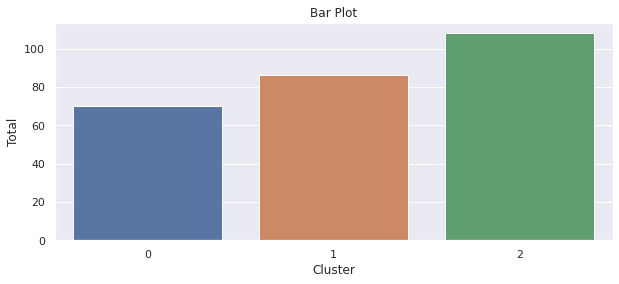

In [117]:
genders = df.Cluster.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.title('Bar Plot')
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.show()

In [118]:
df.Cluster.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

2    40.9%
1    32.6%
0    26.5%
Name: Cluster, dtype: object

# Cross tabulation

In [119]:
 ct = pd.crosstab(df['Cluster'], df['Time'])

In [120]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
ct

Time,00:00-00:59,01:00-01:59,02:00-02:59,03:00-03:59,04:00-04:59,05:00-05:59,06:00-06:59,07:00-07:59,08:00-08:59,09:00-09:59,10:00-10:59,11:00-11:59,12:00-12:59,13:00-13:59,14:00-14:59,15:00-15:59,16:00-16:59,17:00-17:59,18:00-18:59,19:00-19:59,20:00-20:59,21:00-21:59,22:00-22:59,23:00-23:59
Cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,11,10,11,11,11,6,0,0,0,0,0,1,0,2,1,1,0,1,0,0,0,0,1,3
1,0,0,0,0,0,0,1,10,10,8,7,7,5,1,4,6,8,9,2,6,1,1,0,0
2,0,1,0,0,0,5,10,1,1,3,4,3,6,8,6,4,3,1,9,5,10,10,10,8


In [121]:
print(ct)

Time     00:00-00:59  01:00-01:59  02:00-02:59  03:00-03:59  04:00-04:59  \
Cluster                                                                    
0                 11           10           11           11           11   
1                  0            0            0            0            0   
2                  0            1            0            0            0   

Time     05:00-05:59  06:00-06:59  07:00-07:59  08:00-08:59  09:00-09:59  \
Cluster                                                                    
0                  6            0            0            0            0   
1                  0            1           10           10            8   
2                  5           10            1            1            3   

Time     10:00-10:59  11:00-11:59  12:00-12:59  13:00-13:59  14:00-14:59  \
Cluster                                                                    
0                  0            1            0            2            1   
1         

# Violin plot of Road Accidents

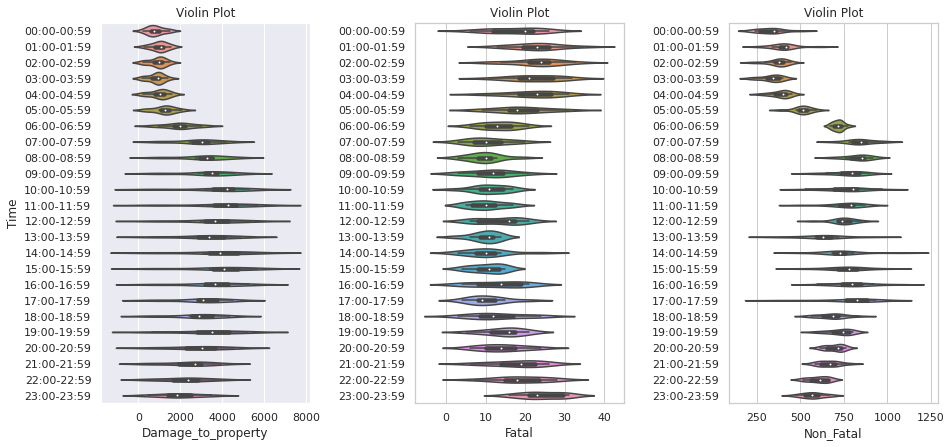

In [122]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Damage_to_property', 'Fatal', 'Non_Fatal']:
    n += 1
    plt.subplot(1, 3, n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Time' , data = df)
    plt.ylabel('Time' if n == 1 else '')
    plt.title('Violin Plot')
plt.show()

# Scatterplot with ConvexHull

In [123]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Non_Fatal', 'Fatal', 'Damage_to_property']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

In [124]:
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Damage_to_property', 'Fatal']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Text(0, 0.5, 'Fatal')

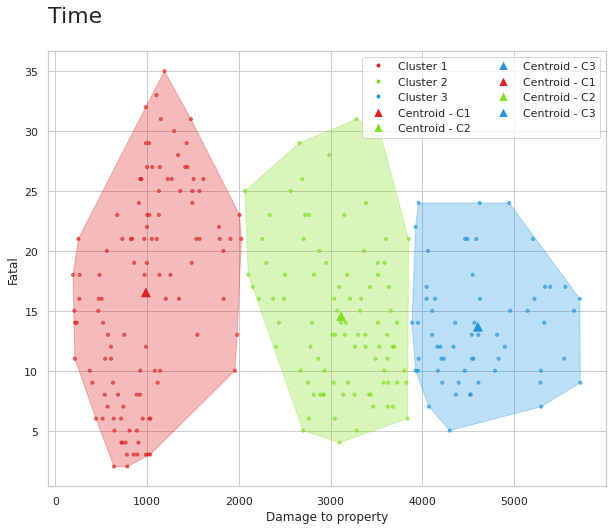

In [125]:
from scipy.spatial import ConvexHull
from matplotlib.lines import Line2D
import numpy as np
fig, ax = plt.subplots(1, figsize=(10,8))
# plot data
plt.scatter(df.Damage_to_property, df.Fatal, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Damage_to_property', 'Fatal']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
# legend
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1), 
                   markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]
legend_elements.extend([Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)])
## centroids
cent_leg = [Line2D([0], [0], marker='^', color='w', label='Centroid - C{}'.format(i+1), 
            markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

legend_elements.extend(cent_leg)
plt.legend(handles=legend_elements, loc='upper right', ncol=2)

# data=df.iloc[:,0:2].values
# for i in range(len(data)):
#     x = data[i][0]
#     y = data[i][1]
#     plt.text(x * (1 + 0.01), y * (1 + 0.01), df.Time[i], fontsize=8)

plt.title('Time\n', loc='left', fontsize=22)
plt.xlabel('Damage to property')
plt.ylabel('Fatal')